In [104]:
import pandas as pd
import datetime as dt
import numpy as np
import plotly.graph_objects as go
import plotly.express as px
import matplotlib.pyplot as plt

df = pd.read_csv("src/data/analyzed/daily_demand_clean.csv")
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d', errors='coerce')
df['day_of_year'] = df['date'].dt.dayofyear
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

# filter for after Jan 2019
df = df[df['date'] >= "2019-01-01"] 

In [137]:
df = pd.read_csv("src/data/raw/power_data.csv")
df['date'] = df['date'].astype(str).str[:10]
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d', errors='coerce')
df.set_index('date',inplace=True)
df[df['country'] == 'BE'].loc['2024-01']

,country,demand,type
date,,,
2024-01-01,BE,1299.650000,power
2024-01-02,BE,1352.358333,power
2024-01-03,BE,1465.216667,power
2024-01-04,BE,3166.058333,power
2024-01-05,BE,2282.633333,power
2024-01-06,BE,2834.100000,power
2024-01-07,BE,1853.050000,power
2024-01-08,BE,5473.783333,power
2024-01-09,BE,6947.716667,power


In [122]:
df.set_index('date',inplace=True)

/var/folders/65/v55t85jx0k799mrx8ctk7yvr0000gn/T/ipykernel_27420/2398257601.py:1: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



<Axes: xlabel='date'>

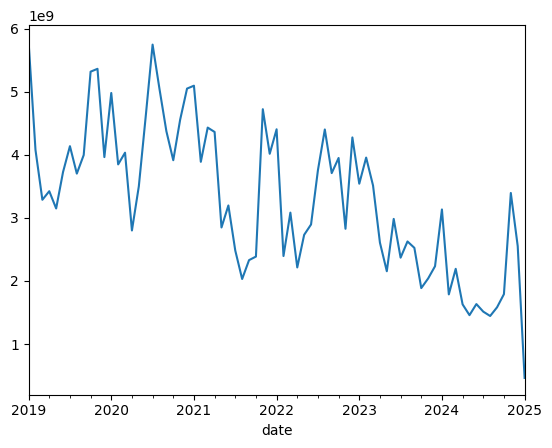

In [128]:
df_plot = df[(df['country'] == 'BE') & (df['type'] == 'power')].groupby(pd.Grouper(freq='M'))['demand'].sum()
df_plot.plot()

In [118]:
df_pivot = df[df['country'] == 'DE'].pivot_table(index='date',columns='type',values='demand').groupby(pd.Grouper(freq='M')).sum()/1000000000
#df_pivot['test_total'] = df_pivot[['household','power','industry']].sum(axis=1)
#df_pivot['test_total_two'] = df_pivot[['household','industry-power','power']].sum(axis=1)
df_pivot.loc['2021':]

/var/folders/65/v55t85jx0k799mrx8ctk7yvr0000gn/T/ipykernel_27420/3640030428.py:1: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



type,power,total
date,,
2021-01-31,0.000572,139.730430
2021-02-28,0.000500,119.615230
2021-03-31,0.000504,114.322345
2021-04-30,0.000422,96.204969
2021-05-31,0.000244,71.387299
2021-06-30,0.000281,47.033393
2021-07-31,0.000234,46.332838
2021-08-31,0.000146,45.697197
2021-09-30,0.000242,50.356282


In [105]:
df[df['country'] == 'HU']['type'].unique()

array(['household', 'industry', 'industry-power', 'power', 'total'],
      dtype=object)

In [2]:
for country in df['country'].unique():

    print(country)

    df_country = df[df['country'] == country]

    for type in df_country['type'].unique():

        print(type)

        df_type = df_country[df_country['type'] == type]
        df_pivot = df_type.pivot_table(index='day_of_year', columns='year', values='demand')

        # Check for available years and calculate average (eg for LV only 2020 and 2021 available)
        years_to_average = [2019, 2020, 2021]
        available_years = [year for year in years_to_average if year in df_pivot.columns]

        if len(available_years) == 3:  # All three years available
            df_pivot['2019-21-AVG'] = df_pivot[available_years].mean(axis=1)
        elif len(available_years) == 2 and set(available_years) == {2020, 2021}:  # Only 2020 and 2021 available
            df_pivot['2020-21-AVG'] = df_pivot[available_years].mean(axis=1)
        else:
            print(f"Not enough data to calculate average for {country}, {type}. Available years: {available_years}")

        df_pivot = df_pivot.drop(columns=available_years)

        # Plot using Plotly
        fig = go.Figure()

        # Calculate seven-day rolling average for each year
        df_pivot_rolling = df_pivot.rolling(window=7).mean()

        # Add traces for each year
        for year in df_pivot_rolling.columns:
            fig.add_trace(go.Scatter(x=df_pivot.index, y=df_pivot[year], mode='lines', name=str(year)))

        # Update layout
        fig.update_layout(title=f'Daily Natural Gas Demand for {country}, {type}',
                        xaxis_title='Day of Year',
                        yaxis_title='kWh per day',
                        legend_title='Year')

        fig.write_html(f"src/figures/daily_raw/{country}_{type}.html") 

AT
power
total
BE
household
industry
power
total
BG
power
total
CZ
power
DE
power
total
DK
power
total
EE
power
total
FI
power
FR
household
industry
power
total
GR
power
HR
power
total
HU
household
industry-power
power
total
IE
household
industry
power
total
IT
household
industry
power
total
LT
power
LU
household
industry-power
power
total
LV
power
total
NL
household
industry
power
Not enough data to calculate average for NL, power. Available years: []
total
PL
power
total
PT
household
industry-power
power
total
RO
household
industry-power
power
total
SE
power
Not enough data to calculate average for SE, power. Available years: [2021]
SI
power
total
SK
power
UK
household
industry
power
total


In [4]:
df[df['country'] == 'BE']

,country,type,date,demand,day_of_year,year
4389,BE,household,2019-01-01,354689232.0,1,2019
4390,BE,household,2019-01-02,435736177.0,2,2019
4391,BE,household,2019-01-03,457614803.0,3,2019
4392,BE,household,2019-01-04,474174699.0,4,2019
4393,BE,household,2019-01-05,421980688.0,5,2019
...,...,...,...,...,...,...
13184,BE,total,2025-01-04,672541231.0,4,2025
13185,BE,total,2025-01-05,549439296.0,5,2025
13186,BE,total,2025-01-06,572267474.0,6,2025
13187,BE,total,2025-01-07,648475427.0,7,2025
